# **Data Visualization**

<p style="text-align: center;">
    <img style="width: 35%; height: 20%; float: left;" src="../assets/images/data_visualization.jpg" alt="Data Visualization image">
</p>

## Objectives

* Accomplish first business requirement:

  _**"The client is interested in conducting a study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew."**_

## Inputs Required

* Image data will be sourced from the following directories and their subfolders:

  - **Training Images**: inputs/cherry_leaves_dataset/cherry-leaves/train
  - **Validation Images**: inputs/cherry_leaves_dataset/cherry-leaves/validation
  - **Test Images**: inputs/cherry_leaves_dataset/cherry-leaves/test

## Generated Outputs

1. Embeddings for Image Shapes.
2. Average and variability of images per label plot.
3. Plot to distinguish the contrast between healthy leaves and ones infected with powdery mildew.
4. Generate code that satisfies business requirement 1 and can be used to build an image montage on the Streamlit dashboard.

---

# Set up the working environment

## Import libraries

In [1]:
import os
import joblib
import itertools
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
sns.set_style("white")
print("\033[92mLibraries Imported Successfully!\033[0m")

Libraries Imported Successfully!


# Change working directory

* To maintain a straightforward folder structure for the application, we must navigate from the current folder to its parent folder by using `os.getcwd()` to access the current directory.

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/mildew-detection-in-cherry-leaves/jupyter_notebooks'

* To update the current directory to its parent directory, follow these steps:

  * Use `os.path.dirname()` to obtain the parent directory.
  * Utilize `os.chdir()` to set the new current directory to the parent directory.

In [3]:
os.chdir(os.path.dirname(current_dir))
print(f"\033[92mYou set a new current directory!\033[0m")

You set a new current directory!


* Confirm the new current directory.

In [4]:
new_current_dir = os.getcwd()
new_current_dir

'/workspaces/mildew-detection-in-cherry-leaves'

# Set input and output directory paths

**Inputs**

In [5]:
data_dir = 'inputs/cherry_leaves_dataset/cherry-leaves'
train_path = data_dir + '/train'
validation_path = data_dir + '/validation'
test_path = data_dir + '/test'

**Outputs**

In [6]:
version = 'V_1'

file_path = f'outputs/{version}'
version_file_path = os.path.join(new_current_dir, file_path)

if os.path.exists(version_file_path):
    # check version file path exists, if not creates a new directory.
     print(f"\033[91mVersion {version} already exists. Create a new version please! \033[0m")
     pass
else:
    os.makedirs(name=file_path)
    print(f"\033[92mVersion {version} created successfully! \033[0m")

Version V_1 already exists. Create a new version please! 


# Set label names

In [7]:
labels = os.listdir(train_path)
print('Labels for the images are:', labels)

Labels for the images are: ['healthy', 'powdery_mildew']


---

# Data Visualization of image data 

## Average image shape (width, height) in pixels (px)
  * Note: The terms "average" and "mean" will be used interchangeably.

Width average: 256 px 
Height average: 256 px 



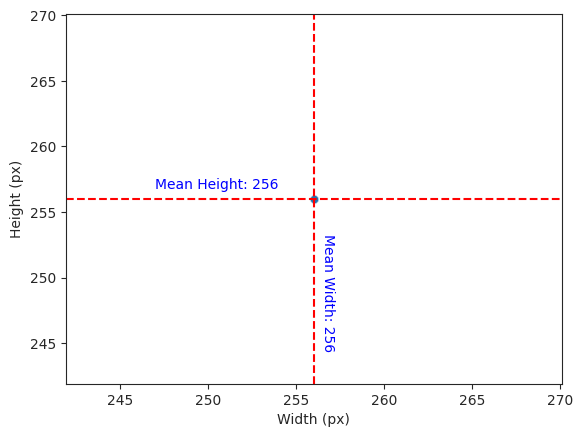

In [11]:
# Initialize two empty lists to store image dimensions
width, height = [], []

# Iterate through labels and image files in train dataset dir
for label in labels:
    for image_filename in os.listdir(os.path.join(train_path, label)):
        img = imread(os.path.join(train_path, label, image_filename))
        h, w, colors = img.shape # read each image shape
        height.append(h) # image height
        width.append(w) # iamge width

# Compute average/mean for each dimesnsion w, h
height_mean = int(np.array(height).mean())
width_mean = int(np.array(width).mean())

# Create plot of average image shape
sns.set_style('ticks')
fig, axes = plt.subplots()
sns.scatterplot(x=width, y=height, alpha=0.5)
axes.set_xlabel('Width (px)')
axes.set_ylabel('Height (px)')
axes.axvline(x=width_mean, color='r', linestyle='--')
axes.axhline(y=height_mean, color='r', linestyle='--')
axes.annotate(f'Mean Height: {height_mean}', (width_mean, height_mean), xytext=(-25, 15),
              textcoords='offset points', color='b', ha='right', va='top')
axes.annotate(f'Mean Width: {width_mean}', (width_mean, height_mean), xytext=(5, -25),
              textcoords='offset points', color='b', ha='left', va='top', rotation=270)
plt.show
print(f"Width average: \033[1m{width_mean} px\033[0m \nHeight average: \033[1m{height_mean} px\033[0m \n")


**Interpretation & Insights:**

* In the plot, the blue dot positioned at the intersection of the two red dashed lines represents the average image shape: (256, 256, 3) 
* The horizontal red dashed line signifies the mean height of the images, which is 256 pixels.
* Additionally, the vertical red dashed line corresponds to the mean width of the images, also measuring 256 pixels.

This visualization offers insights into the distribution of image dimensions within the dataset. This information aids in understanding the typical dimensions of images and potential variations in the dataset's contents.

In [9]:
av_image_shape = (height_mean, width_mean, colors)
print(f'\033[1mAverage image shape is: {av_image_shape}\033[0m')

Average image shape is: (256, 256, 3)


Save the image shape in a pkl file.

In [10]:
joblib.dump(value=av_image_shape, filename=f"{file_path}/av_image_shape.pkl")

['outputs/V_1/av_image_shape.pkl']

---